In [14]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

%run Data.ipynb import *
%run Queries.ipynb import *

In [15]:
conn_params = {
    "host": "localhost",
    "database": "voyagesDW",
    "user": "postgres",
    "password": "goose123",
    "sslmode": "disable"
}

# Длина - Прибыль (Single Link)

In [55]:
x = length_profit['column_names'][0]
y = length_profit['column_names'][1]
df = get_dataframe(conn_params, length_profit['query'], length_profit['column_names'])

## Оригинальное распределение значений Длин судов

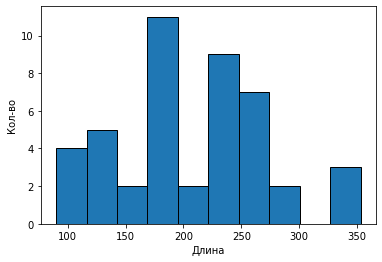

In [56]:
plt.hist(df[x], edgecolor='black')
plt.xlabel('Длина')
plt.ylabel('Кол-во')
plt.show()

## Оригинальное распределение значений Прибыли за рейс

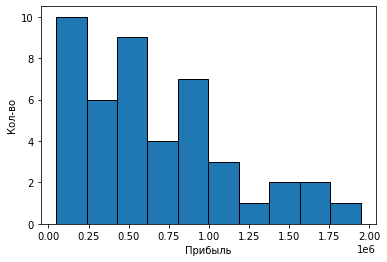

In [57]:
plt.hist(df[y], edgecolor='black')
plt.xlabel('Прибыль')
plt.ylabel('Кол-во')
plt.show()

## Дендрограмма (Single Link, w/o z-score)

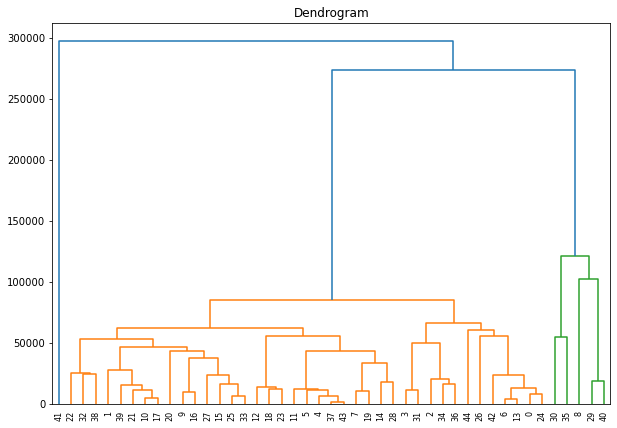

In [26]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = shc.dendrogram(shc.linkage(df, method='single'))
plt.show()

## Применение алгоритма (n = 3)

In [60]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')
cluster.fit_predict(df)

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 1, 2, 2,
       2], dtype=int64)

## Результат кластеризации (Single Link, w/o z-score)

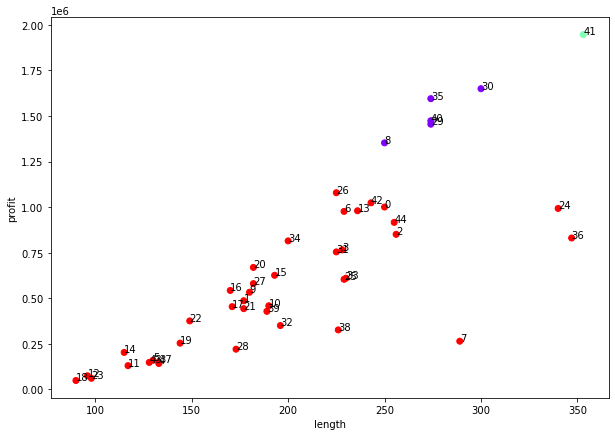

In [61]:
plt.figure(figsize=(10, 7))
plt.scatter(df[x], df[y], c=cluster.labels_, cmap='rainbow')

for i, point in df.iterrows():
    plt.annotate(str(i), point)

plt.xlabel(x)
plt.ylabel(y)
plt.show()

## Z-score

In [62]:
df = z_score(df)

## Распределение значений Длин судов после Z-score

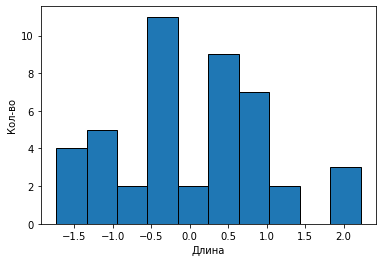

In [66]:
plt.hist(df[x], edgecolor='black')
plt.xlabel('Длина')
plt.ylabel('Кол-во')
plt.show()

## Распределение значений Прибылей за рейс после Z-score

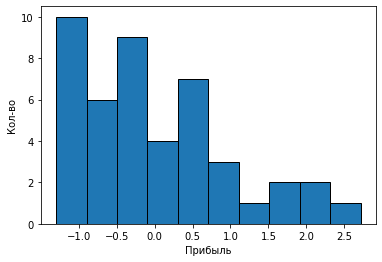

In [67]:
plt.hist(df[y], edgecolor='black')
plt.xlabel('Прибыль')
plt.ylabel('Кол-во')
plt.show()

## Дендрограмма (Single Link, w/ z-score)

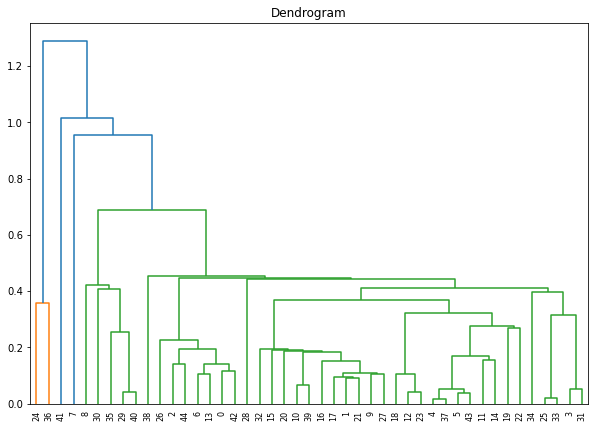

In [68]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = shc.dendrogram(shc.linkage(df, method='single'))
plt.show()

## Применение алгоритма (n = 4)

In [64]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='single')
cluster.fit_predict(df)

array([0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0,
       0], dtype=int64)

## Результат кластеризации (Single Link, w/ z-score)

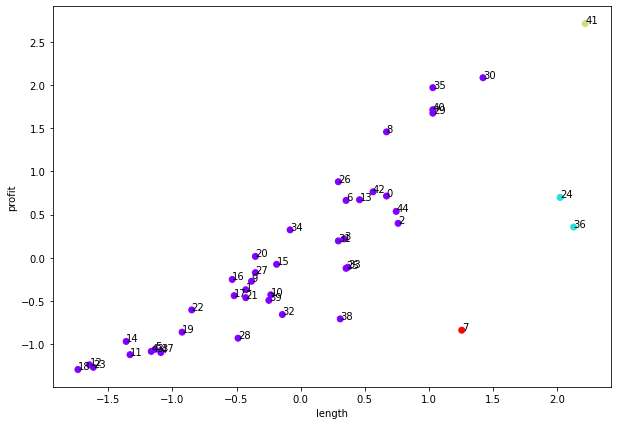

In [69]:
plt.figure(figsize=(10, 7))
plt.scatter(df[x], df[y], c=cluster.labels_, cmap='rainbow')

for i, point in df.iterrows():
    plt.annotate(str(i), point)

plt.xlabel(x)
plt.ylabel(y)
plt.show()

# Дедвейт - Затраты на топливо (Complete Link)

In [70]:
x = dwt_fuel['column_names'][0]
y = dwt_fuel['column_names'][1]
df = get_dataframe(conn_params, dwt_fuel['query'], dwt_fuel['column_names'])

## Оригинальное распределение значений Дедвейта судов

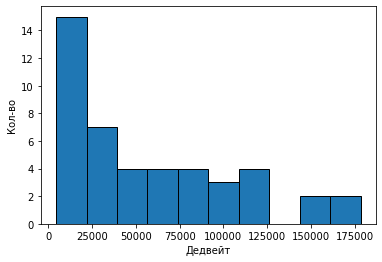

In [71]:
plt.hist(df[x], edgecolor='black')
plt.xlabel('Дедвейт')
plt.ylabel('Кол-во')
plt.show()

## Оригинальное распределение значений Затрат на топливо

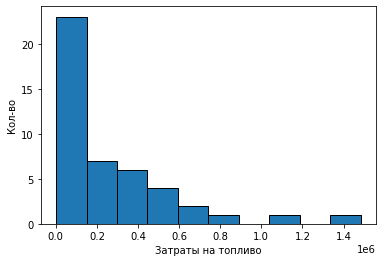

In [72]:
plt.hist(df[y], edgecolor='black')
plt.xlabel('Затраты на топливо')
plt.ylabel('Кол-во')
plt.show()

## Дендрограмма (Complete Link, w/o log)

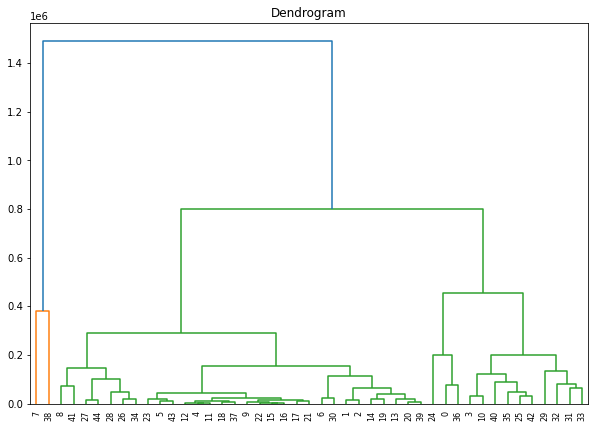

In [74]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = shc.dendrogram(shc.linkage(df, method='complete'))
plt.show()

## Применение алгоритма (n = 2)

In [75]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
cluster.fit_predict(df)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0], dtype=int64)

## Результат кластеризации (Complete Link, w/o log)

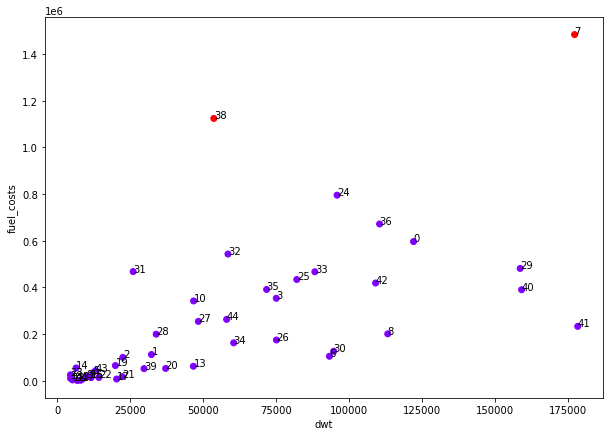

In [76]:
plt.figure(figsize=(10, 7))
plt.scatter(df[x], df[y], c=cluster.labels_, cmap='rainbow')

for i, point in df.iterrows():
    plt.annotate(str(i), point)

plt.xlabel(x)
plt.ylabel(y)
plt.show()

## Log Transform

In [77]:
df = np.log(df)

## Распределение значений Дедвейта судов после log

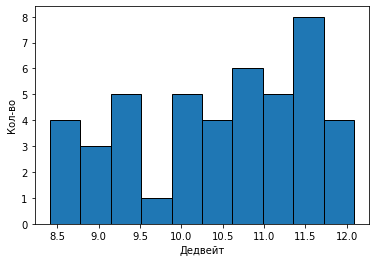

In [78]:
plt.hist(df[x], edgecolor='black')
plt.xlabel('Дедвейт')
plt.ylabel('Кол-во')
plt.show()

## Распределение значений Затрат на топливо после log

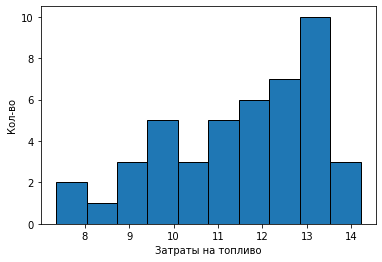

In [79]:
plt.hist(df[y], edgecolor='black')
plt.xlabel('Затраты на топливо')
plt.ylabel('Кол-во')
plt.show()

## Дендрограмма (Complete Link, w/ log)

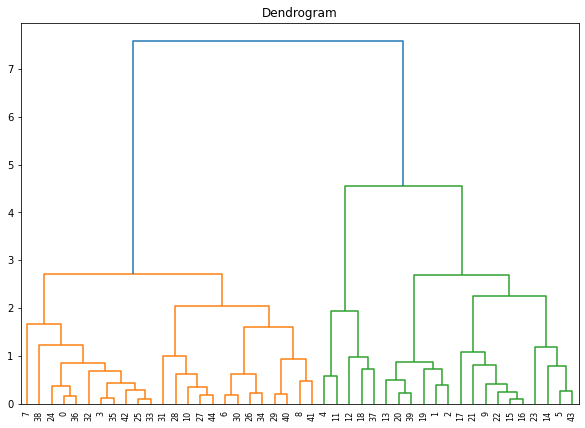

In [81]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = shc.dendrogram(shc.linkage(df, method='complete'))
plt.show()

## Применение алгоритма (n = 2)

In [82]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
cluster.fit_predict(df)

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1], dtype=int64)

## Результат кластеризации (Complete Link, w/ log)

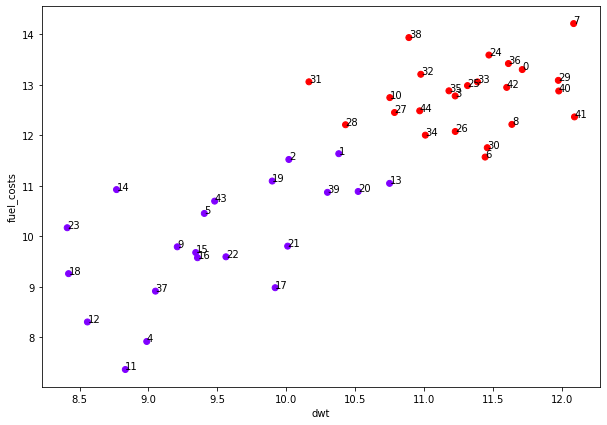

In [83]:
plt.figure(figsize=(10, 7))
plt.scatter(df[x], df[y], c=cluster.labels_, cmap='rainbow')

for i, point in df.iterrows():
    plt.annotate(str(i), point)

plt.xlabel(x)
plt.ylabel(y)
plt.show()